# Housing

Initially I post a question to ChatGPT 'Give some examples how I can analyze data and data quality for data used in an AI model' and got these ten steps suggested. The whole ChatGPT answer is added as csv-file. I will conduct an analysis according to steps 1-5 as I find these useful and feasable for this assignment.

1. **Data Completeness**
2. **Data Consistency**
3. **Data Accuracy**
4. **Data Distribution**
5. **Data Relevance**
6. Data Size & Representativeness
7. Data Integrity and Sources
8. Data Normalization and Standardization
9. Temporal Consistency (for Time-Series Data)
10. Data Validation Using Cross-Validation


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [3]:
housing_original = pd.read_csv("housing.csv")
housing_original.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## Data completeness
Checking for missing values and/or incomplete data

In [5]:
housing_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
housing = housing_original.dropna()
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


#### -- Result Data completeness --
Running dropna function on the dataset removing alla rows where there are missing values. The dataset i reduced from 20640 rows t0 20433 rows.

## Data Consistency
Checking that there are no duplicates and that data is formatted uniformly or numerical values is in a consistent scale

In [9]:
housing_dublicat = housing[housing.duplicated(subset=None, keep='first')]
housing_dublicat.shape

(0, 10)

In [10]:

#Calculating the mean value for each category of ocean_proximity
print(housing_original.groupby('ocean_proximity')['median_house_value'].mean())

ocean_proximity
<1H OCEAN     240084.285464
INLAND        124805.392001
ISLAND        380440.000000
NEAR BAY      259212.311790
NEAR OCEAN    249433.977427
Name: median_house_value, dtype: float64


In [11]:

#Counting number of instanses in each category of ocean_proximity
print(housing_original.groupby('ocean_proximity')['median_house_value'].count())

ocean_proximity
<1H OCEAN     9136
INLAND        6551
ISLAND           5
NEAR BAY      2290
NEAR OCEAN    2658
Name: median_house_value, dtype: int64


In [12]:

# Creating a new field giving a numeric valute for the field ocean_proximity

dictionary_ocean_proximity = {'INLAND':1,'<1H OCEAN':2,'NEAR OCEAN':3,'NEAR BAY':4,'ISLAND':5}

housing_modified = housing.copy()
housing_modified['ocean_proximity_rank'] = housing_modified['ocean_proximity'].map(dictionary_ocean_proximity) 

housing_modified.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,ocean_proximity_rank
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,4
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,4
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,4
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,4


### -- Result Data Consistency --
There are no duplicate rows in the dataset

The data appear to be aggregated data (by city?). Most of the numbes are median while two columns are named "totals", total_rooms and total_bedrooms. These columns should also be expressed as median values to be consistent with the others.
Median_income isn't explained if it is monthly or yearly income making it hard to decide if it is expressed as thousand dollar or not.

The column ocean_proximity is a text-value which is hard to do further analysis on. The field should be converted to a numeric value preferable analogue number like "distance to ocean" but for now I only translate the text to their rank according to the mean value of median_house_value. There are only 5 instances of ocean_proximity=ISLAND and we should consider if this is too few instances to make a model on.

## Data Accuracy and data distribution
Finding out if there are outliers in the dataset that can skew the result


In [15]:
housing_modified.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_rank
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155,2.033622
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099,0.944472
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,1.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000,1.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000,2.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000,2.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,5.000000


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>],
       [<Axes: title={'center': 'ocean_proximity_rank'}>, <Axes: >,
        <Axes: >]], dtype=object)

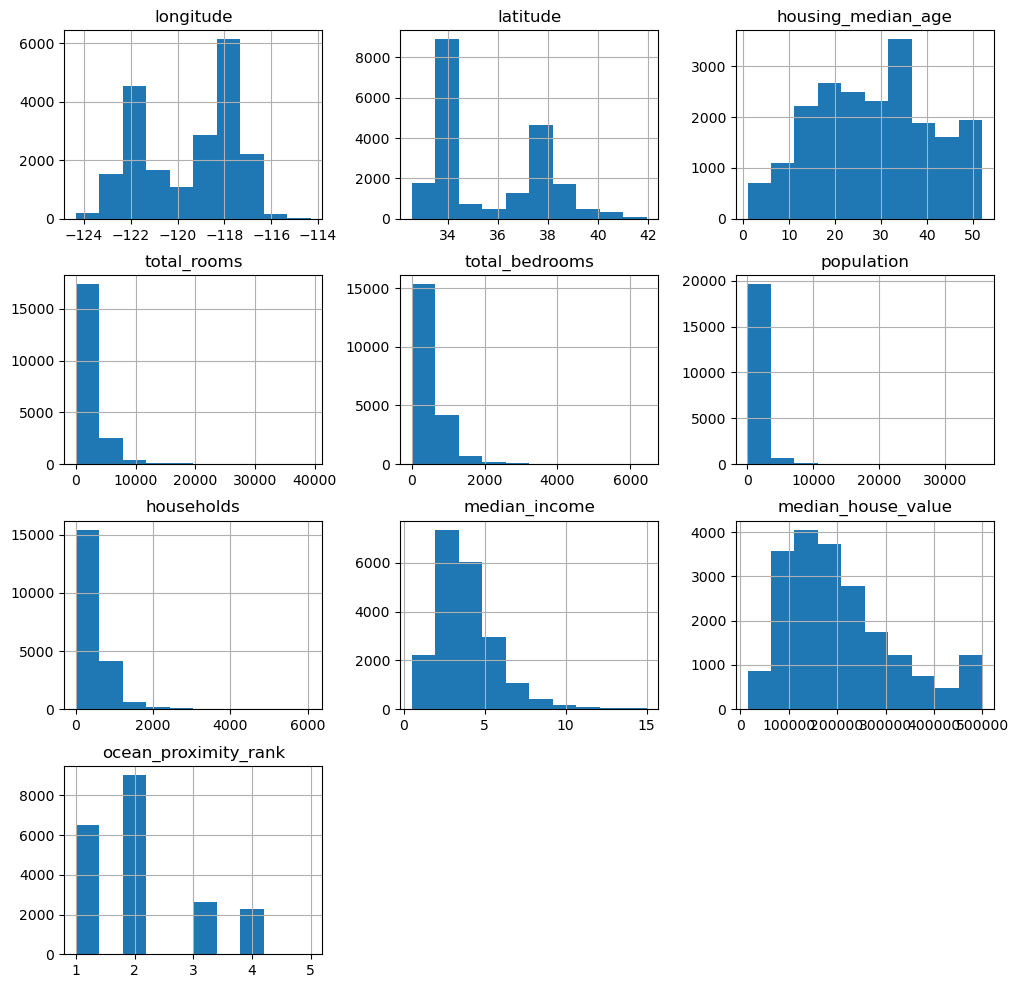

In [16]:
housing_modified.hist(figsize=(12, 12))

array([[<Axes: xlabel='housing_median_age', ylabel='housing_median_age'>,
        <Axes: xlabel='population', ylabel='housing_median_age'>,
        <Axes: xlabel='households', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='median_house_value', ylabel='housing_median_age'>],
       [<Axes: xlabel='housing_median_age', ylabel='population'>,
        <Axes: xlabel='population', ylabel='population'>,
        <Axes: xlabel='households', ylabel='population'>,
        <Axes: xlabel='median_income', ylabel='population'>,
        <Axes: xlabel='median_house_value', ylabel='population'>],
       [<Axes: xlabel='housing_median_age', ylabel='households'>,
        <Axes: xlabel='population', ylabel='households'>,
        <Axes: xlabel='households', ylabel='households'>,
        <Axes: xlabel='median_income', ylabel='households'>,
        <Axes: xlabel='median_house_value', ylabel='households'>],
       [<Axes: xlabel='housing

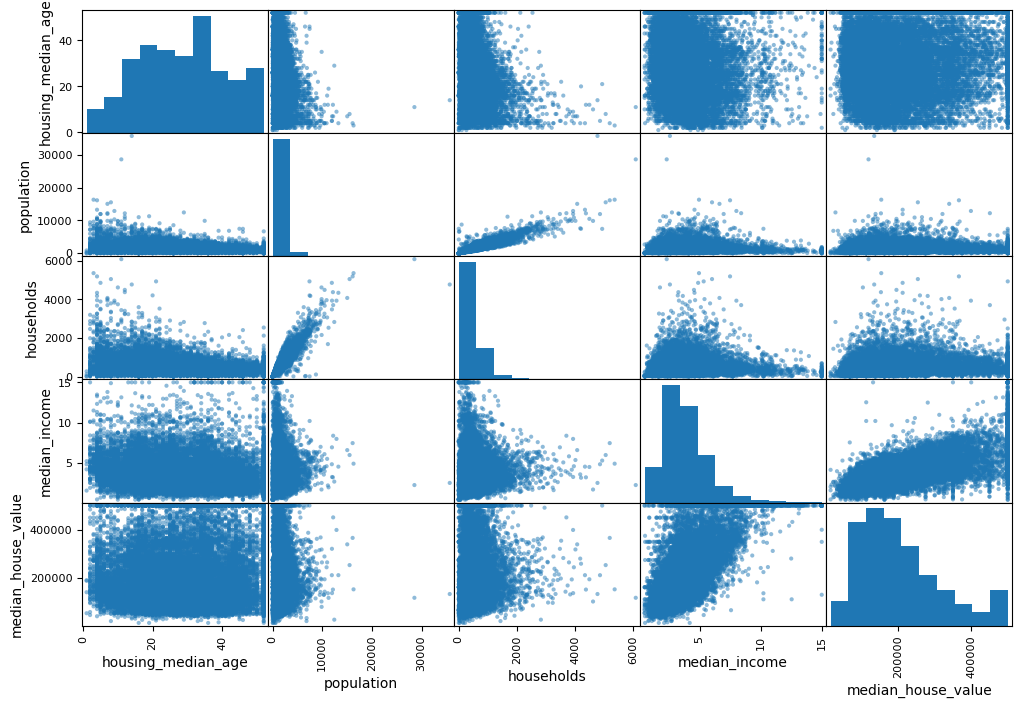

In [17]:
attributes = ["housing_median_age", "population", "households", "median_income","ocean_proximity", "median_house_value"]
pd.plotting.scatter_matrix(housing_modified[attributes], figsize=(12, 8))

### -- Result Data Accuracy and data distribution --

Indicator from the Describe function <br>
The min and max-value of population and households seems deviant and should be further checked out.
The max - value of median_income also need to be checked as it is very high. Five times the average value.

Histogram<br>
Analysing the histograms distribution of median_income seems resonable (despite the very high max value)

Housing_median_age have a peek of instances around age 33-34. This might be correct but should be looked into.

Median_house_value don't have a normal distribution as the houses with the highest value are all clustered at the same level 500 000. This appear in all the scatter-plots for median_house_value

## Data Relevance

Determine whether the features in the dataset are relevant to the problem

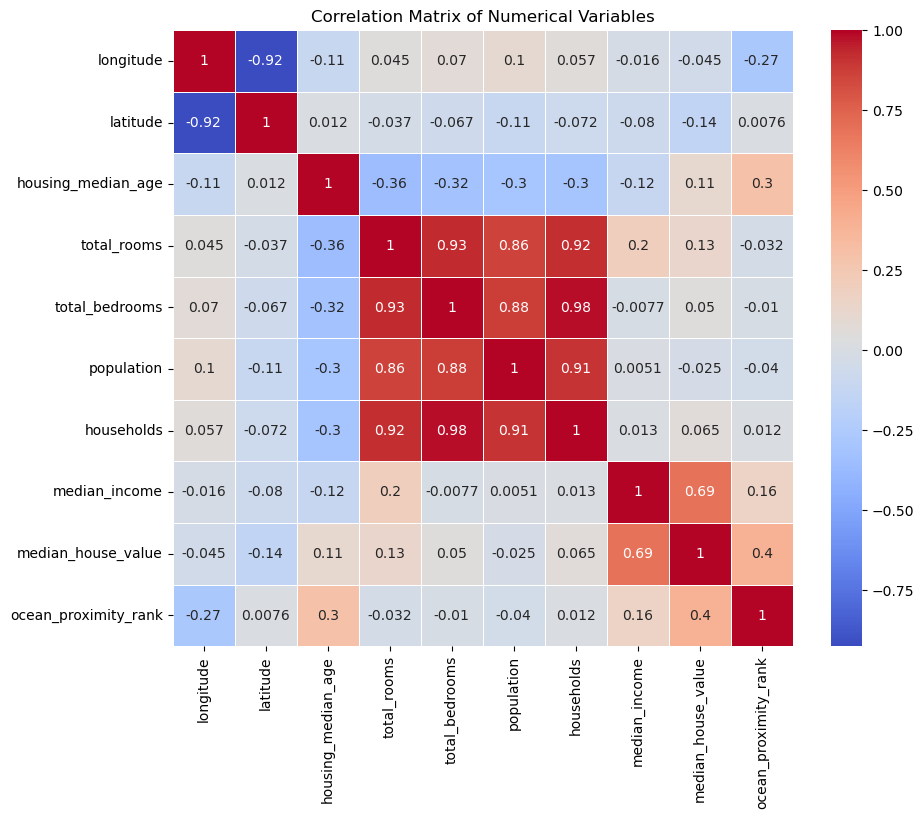

In [20]:
# Heatmap of correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = housing_modified.select_dtypes(include=[np.number]).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

### -- Result Data Relevance --

From the Correlation Matrix we see that the attribute with the highest correlation is median_income (0.69) and ocean_proximity_rank (0.4)
The higher the median_income in the area and the higher the ocean_proximity_rank the higher the house_value.

Beside this there seem to be a correlation between the attribute total_rooms, total_bedrooms, population, households. Maybe some of this attributes can (or should) be removed.
 

## Avslutande kommentarer
1. Har något varit utmanande i kunskapskontrollen? Om ja, hur har du hanterat det?<br>Jag ville gärna ha någon form av checklista, en struktur för min analys. Jag frågade ChatGPT.
   
3. Vilket betyg anser du att du ska ha och varför?<br> VG. Jag har en bra förståelse för dataanalys och ett strukturerat tillvägagångsätt. Jag har efter varje stycke fomulerat slutsatser med egna ord.

5. Något du vill lyfta fram till Antonio? <br> Nej :)